In [32]:
from pytrends.request import TrendReq

In [33]:
pip install pytrends seaborn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from pytrends.request import TrendReq
import seaborn
# for styling
seaborn.set_style("darkgrid")

In [35]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

In [36]:
# set the keyword & timeframe
pt.build_payload(["Python", "Java"], timeframe="all")

# get the interest over time
iot = pt.interest_over_time()
iot

,Python,Java,isPartial
date,,,
2004-01-01,8,94,False
2004-02-01,8,97,False
2004-03-01,8,100,False
2004-04-01,7,95,False
2004-05-01,7,93,False
...,...,...,...
2022-07-01,23,17,False
2022-08-01,24,17,False
2022-09-01,25,18,False


<AxesSubplot:xlabel='date'>

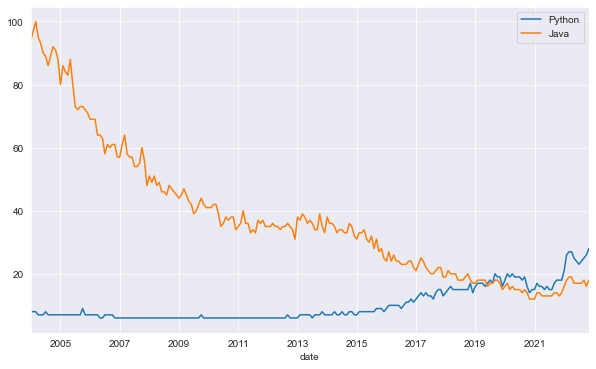

In [37]:
# plot it
iot.plot(figsize=(10, 6))

In [38]:
# get hourly historical interest
data = pt.get_historical_interest(
    ["data science"], 
    year_start=2022, month_start=1, day_start=1, hour_start=0,
    year_end=2022, month_end=2, day_end=10, hour_end=23,
)
data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytrends/request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytrends/request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytrends/request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytrends/request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

,data science,isPartial
date,,
2022-01-01 00:00:00,27,False
2022-01-01 01:00:00,21,False
2022-01-01 02:00:00,19,False
2022-01-01 03:00:00,43,False
2022-01-01 04:00:00,24,False
...,...,...
2022-02-10 19:00:00,50,False
2022-02-10 20:00:00,40,False
2022-02-10 21:00:00,35,False


<AxesSubplot:xlabel='date'>

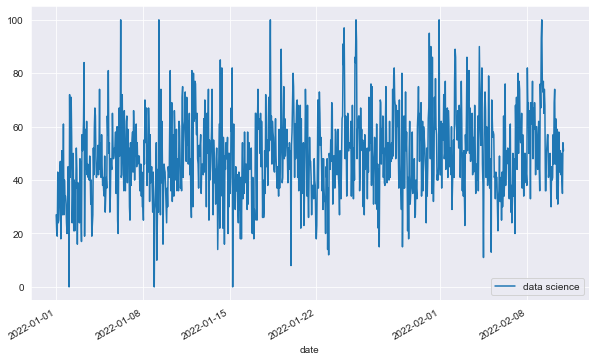

In [39]:
data.plot(figsize=(10, 6))

In [40]:
# the keyword to extract data
kw = "python"
pt.build_payload([kw], timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)

ResponseError: The request failed: Google returned a response with code 429.

In [ ]:
# sort the countries by interest
ibr[kw].sort_values(ascending=False)

geoName
British Indian Ocean Territory       100
St. Helena                            57
China                                 42
Singapore                             40
South Korea                           39
                                    ... 
Samoa                                  0
Equatorial Guinea                      0
Falkland Islands (Islas Malvinas)      0
French Southern Territories            0
Cook Islands                           0
Name: python, Length: 250, dtype: int64

In [ ]:
# get related topics of the keyword
rt = pt.related_topics()
rt[kw]["top"]

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05z1_&date=all,/m/05z1_,Python,Programming language
1,7,7,True,/trends/explore?q=/m/01dlmc&date=all,/m/01dlmc,List,Abstract data type
2,6,6,True,/trends/explore?q=/m/06x16&date=all,/m/06x16,String,Computer science
3,6,6,True,/trends/explore?q=/m/020s1&date=all,/m/020s1,Computer file,Topic
4,4,4,True,/trends/explore?q=/m/0cv6_m&date=all,/m/0cv6_m,Pythons,Snake
5,3,3,True,/trends/explore?q=/m/026sq&date=all,/m/026sq,Data,Topic
6,3,3,True,/trends/explore?q=/m/0nk18&date=all,/m/0nk18,Associative array,Topic
7,3,3,True,/trends/explore?q=/m/02v_93z&date=all,/m/02v_93z,Function,Mathematics
8,3,3,True,/trends/explore?q=/m/04sd0&date=all,/m/04sd0,Monty Python,Comedy troupe
9,3,3,True,/trends/explore?q=/m/0wcx&date=all,/m/0wcx,Array,Data structure


In [ ]:
# get related queries to previous keyword
rq = pt.related_queries()
rq[kw]["top"]

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=2)

In [ ]:
# get suggested searches
pt.suggestions("python")

[{'mid': '/m/05z1_', 'title': 'Python', 'type': 'Programming language'},
 {'mid': '/m/04zl8',
  'title': 'Monty Python and the Holy Grail',
  'type': '1975 film'},
 {'mid': '/m/05tb5', 'title': 'Python family', 'type': 'Snake'},
 {'mid': '/g/11dxqcx7f2',
  'title': 'Deep Learning with Python',
  'type': 'Topic'},
 {'mid': '/g/11cs04mpv3',
  'title': 'Python for Everybody: Exploring Data Using Python 3',
  'type': 'Topic'}]

In [ ]:
# another example of suggested searches
pt.suggestions("America")

[{'mid': '/m/07c5l', 'title': 'Americas', 'type': 'Topic'},
 {'mid': '/g/11h81n828j', 'title': 'American Eagle', 'type': 'Topic'},
 {'mid': '/m/0h3mh3q',
  'title': 'American Horror Story',
  'type': 'American television series'},
 {'mid': '/m/028_yv',
  'title': 'Once Upon a Time in America',
  'type': '1984 film'},
 {'mid': '/m/0dt8xq',
  'title': 'Borat: Cultural Learnings Of America For Make Benefit Glorious Nation ...',
  'type': '2006 film'}]

In [ ]:
# trending searches per region
ts = pt.trending_searches(pn="united_kingdom")
ts[:5]

,0
0,Michaela Coel
1,Ronnie Radford
2,Sanna Marin
3,Jollof rice
4,Enola Holmes


In [ ]:
# real-time trending searches
pt.realtime_trending_searches()

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=2)